# Exercise 1

In [1]:
# fit the sigmoid curve and calculate decision boundary using given dataset

# a cheat sheet:
# in an optimization loop
# first calculate hypothesis for each datapoint x in X: h = 1 / (1 + exp(-theta0-theta1*x))
# then calculate crossentropy: -y*log(h) - (1-y)*log(1-h)
# and cost: sum(crossentropy) / len(x)
# next calculate derivatives for theta 0 and theta1 (similar to those in linear regression)
# theta0_deriv = sum(h - y) / len(y), theta1_deriv = sum((h-y)*X)
# and then update theta weights
# theta = theta - lr*theta_deriv

# check if cost is getting lower through iterations
# if not, try to modify the learning rate

# calculating decision boundary might look like this:
# theta[0] + theta[1]*x = 0
# theta[1]*x = -theta[0]
# x = -theta[0]/theta[1]

# the result might look like below

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

In [2]:
# optimization loop
def calculate_theta(x, y, thetas, learning_rate, iterations):
    h = np.zeros(x.shape, dtype = np.float32)
    crossentropy = np.zeros(x.shape, dtype = np.float32)
    thetas_deriv = np.zeros(thetas.shape, dtype = np.float32)
    cost = np.zeros(iterations, dtype = np.float32)
    prev_cost = 99
    eps = 0.000001
    for it in range(iterations): 
        h = 1 / (1 + np.exp(-thetas[0] - thetas[1] *x))
        crossentropy = -y * np.log(h + eps) - (1 - y) * np.log(1 - h + eps)
        cost[it] = np.sum(crossentropy) / len(x)
        thetas_deriv = np.array([np.sum(h - y) / len(h), np.sum((h- y ) * x) / len(y)])
        thetas = thetas - learning_rate * thetas_deriv
        if np.abs(prev_cost - cost[it]) < eps:
            break
        prev_cost = cost[it]
    return thetas

Definition of algorithm input parametres and optimization loop run

In [3]:
learning_rate = 0.1
iterations = 10000
theta_res = calculate_theta(X, y, theta, learning_rate, iterations)

Printing final theta values

In [4]:
theta_res

array([-14.08685353,   2.18658498])

## Calculating the boundary

In [5]:
boundary =  - theta_res[0] / theta_res[1]

In [6]:
boundary

6.44239928463182

In [7]:
#For plot purposes only
xargs = np.squeeze(X)
yargs = np.squeeze(y)

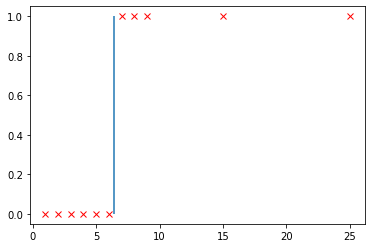

In [8]:
plt.plot(xargs, yargs, 'xr')
plt.vlines(boundary, 0, 1)

# Exercise 2

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1],
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25]], dtype=np.float32)
y = np.array([[0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1]], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

In [9]:
# multidimensional optimization loop
def calculate_theta_multidimensional(X, y, theta, learning_rate, iterations):
    h = np.zeros(X.shape[1], dtype = np.float32)
    crossentropy = np.zeros(X.shape[1], dtype = np.float32)
    theta_deriv = np.zeros(theta.shape, dtype = np.float32)
    theta_res = theta
    cost = np.zeros(iterations)
    eps = 0.000001
    prev_cost = 99
    for it in range(iterations):
        h = 1 / (1 + np.exp(-theta_res.T @ X))
        crossentropy = -y * np.log(h + eps) - (1-y) * np.log(1 - h + eps)
        cost[it] = np.sum(crossentropy) / X.shape[1]
        for i in range(X.shape[0]):
            theta_deriv[i] = np.sum((h-y) @ X[i,:].T) / X.shape[1]
        theta_res = theta_res - learning_rate * theta_deriv
        if np.abs(prev_cost - cost[it]) < eps:
            break
        prev_cost = cost[it]
    return theta_res

Definition of algorithm input parametres and optimization loop run

In [11]:
learning_rate = 0.1
iterations = 100000
theta_result = calculate_theta_multidimensional(X, y, theta, learning_rate, iterations)

Printing final theta values

In [12]:
theta_result

array([-18.722996 ,   2.8965383], dtype=float32)

## Calculating the boundary

In [13]:
boundary =  - theta_result[0] / theta_result[1]

In [14]:
boundary

6.4639215

In [15]:
#For plot purposes only
xargs = np.squeeze(X[1,:])
yargs = np.squeeze(y)

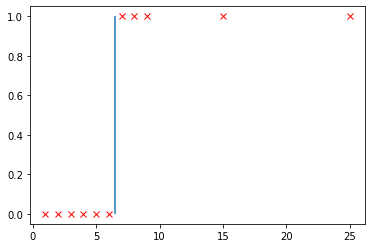

In [16]:
plt.plot(xargs, yargs, 'xr')
plt.vlines(boundary, 0, 1)

# Exercise 3

In [17]:
# using real data, optimize classifier to predict given values

# split dataset into a training set and a test set
# train model on the training set
# calculate TP, FP, TN, FN on test set
# calculate sensitivity, specificity, positive predictivity and negative predictivity

Reading data from file

In [18]:
data = pd.read_csv('./data.txt')
data.insert(loc=0, column='', value=1)
data = data.values

Data standarization

In [19]:
data[:,1] = (data[:,1] - np.mean(data[:,1])) / np.std(data[:,1])
data[:,2] = (data[:,2] - np.mean(data[:,2])) / np.std(data[:,2])

Substracting variables

In [20]:
X = data[:, [0,1,2]]
y = data[:, 3]

Dividing the dataset into train and test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [22]:
#transposing for algorith purposes
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

Input parametres definition and optimization run

In [23]:
theta = np.array([[0], [0], [0]], dtype=np.float32)

In [24]:
learning_rate = 0.1
iterations = 10000
theta_res = calculate_theta_multidimensional(X_train, y_train, theta, learning_rate, iterations)

Printing final theta values

In [25]:
theta_res

array([[1.2523322],
       [3.7839055],
       [2.9406652]], dtype=float32)

Calculating predicted probability based on logistic regression

In [26]:
#calculating predicted values based on theta results
y_pred = 1 / np.exp(-theta_res.T @ X_test)

Transforming given probability into binary variables

In [27]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.squeeze(y_pred)

Calculating accuracy with sklearn metric

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

Calculating recall (sensitivity) with sklearn metric

In [29]:
recall = recall_score(y_test, y_pred)
recall

0.92

Calculating precision (positive predictivity) with sklearn metric

In [30]:
precision = precision_score(y_test, y_pred)
precision

0.92

In [3]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

Calculating specifity

In [32]:
true_pos, false_pos, true_neg, false_neg = perf_measure(y_test, y_pred)
specifity = true_neg / (true_neg + false_pos)
specifity

0.8666666666666667

Calculating true negativity with sklearn metric

In [33]:
neg_pred = true_neg / (true_neg + false_neg)
neg_pred

0.8666666666666667

## Plotting the boundary line

In [34]:
xargs = X_test[1,:]
yargs = -(theta_res[0] + theta_res[1] * xargs) / theta_res[2]

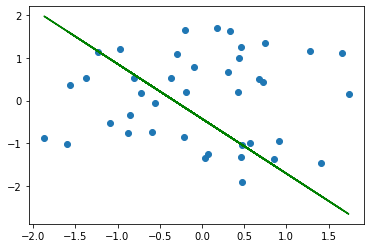

In [35]:
plt.plot(xargs, yargs, 'g')
plt.scatter(X_test[1,:], X_test[2,:])

# Exercise 4 (optional)

## Reading the dataset

In [4]:
def read_data_set(images_path, labels_path, num_images):
    image_size = 28
    # training set
    with open(images_path, 'rb') as f:
        f.read(16)
        buf = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        training_data = data.reshape(num_images, image_size, image_size)
    # labels
    with open(labels_path, 'rb') as f:
        f.read(8)
        buf = f.read(num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        training_labels = data.reshape(num_images)
    return training_data, training_labels

In [5]:
training_data, training_labels = read_data_set('./train-images.idx3-ubyte', './train-labels.idx1-ubyte', 60000)
training_data = training_data/255.0 # can be normalized to converge faster

0.0


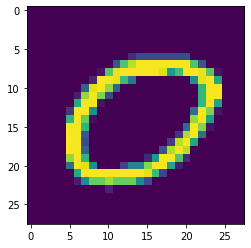

In [6]:
# check if data have been loaded correctly
example_idx = 156
print(training_labels[example_idx])
plt.imshow(training_data[example_idx])

In [7]:
# training data must be vectorized
# from [n_examples, height, width] to [n_examples, n_features]
training_data.shape = [training_data.shape[0], training_data.shape[1] * training_data.shape[2]]

# lets start with '2' vs rest
y = np.array(training_labels == 2, dtype=np.float32)
X = np.concatenate((np.ones((1, len(y))), training_data.T))

theta = np.zeros((X.shape[0], 1))

In [10]:
theta_res = calculate_theta_multidimensional(X, y, theta, learning_rate=0.1, iterations=100)

In [15]:
theta_res

array([[-2.35883273e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 7.17760093e-05],
       [ 4.45766780e-04],
       [ 2.98437091e-04],
       [ 3.82640554e-04],
       [ 1.1

In [16]:
# now we need to read test set and reshape it similarly to training set
test_data, test_labels = read_data_set('./t10k-images.idx3-ubyte', './t10k-labels.idx1-ubyte', 10000)
test_data = test_data / 255.0
test_data.shape = [test_data.shape[0], test_data.shape[1] * test_data.shape[2]]
y = np.array(test_labels == 2, dtype=np.float32)
X = np.concatenate((np.ones((1, len(y))), test_data.T))

In [17]:
# calculate hypothesis for test data
h = 1.0 / (1 + np.exp(-theta.T @ X))
y_pred = h.flatten()

In [18]:
TP, TN, FP, FN = perf_measure(test_labels, y_pred)
print(f'TN: {TN}, TP: {TP}, FP: {FP}, FN: {FN}')

TN: 0, TP: 0, FP: 980, FN: 9020


The classifier seems not to work properly, tested for different parametres of iterations and learning rate.